# Analyzing and Visualizing a Loan Dataset
## by Alf Maglalang

## Preliminary Wrangling

> This loan data is from a lending company called **Prosper**. It was last updated 3/11/2014. It has 113937 records with 81 features, namely

> `ListingKey`, `ListingNumber`, `ListingCreationDate`, `CreditGrade`, `Term`, `LoanStatus`, `ClosedDate`, `BorrowerAPR`, `BorrowerRate`, `LenderYield`, `EstimatedEffectiveYield`, `EstimatedLoss`, `EstimatedReturn`, `ProsperRating (numeric)`, `ProsperRating (Alpha)`, `ProsperScore`, `ListingCategory (numeric)`, `BorrowerState`, `Occupation`, `EmploymentStatus`, `EmploymentStatusDuration`, `IsBorrowerHomeowner`, `CurrentlyInGroup`, `GroupKey`, `DateCreditPulled`, `CreditScoreRangeLower`, `CreditScoreRangeUpper`, `FirstRecordedCreditLine`, `CurrentCreditLines`, `OpenCreditLines`, `TotalCreditLinespast7years`, `OpenRevolvingAccounts`, `OpenRevolvingMonthlyPayment`, `InquiriesLast6Months`, `TotalInquiries`, `CurrentDelinquencies`, `AmountDelinquent`, `DelinquenciesLast7Years`, `PublicRecordsLast10Years`, `PublicRecordsLast12Months`, `RevolvingCreditBalance`, `BankcardUtilization`, `AvailableBankcardCredit`, `TotalTrades`, `TradesNeverDelinquent (percentage)`, `TradesOpenedLast6Months`, `DebtToIncomeRatio`, `IncomeRange`, `IncomeVerifiable`, `StatedMonthlyIncome`, `LoanKey`, `TotalProsperLoans`, `TotalProsperPaymentsBilled`, `OnTimeProsperPayments`, `ProsperPaymentsLessThanOneMonthLate`, `ProsperPaymentsOneMonthPlusLate`, `ProsperPrincipalBorrowed`, `ProsperPrincipalOutstanding`, `ScorexChangeAtTimeOfListing`, `LoanCurrentDaysDelinquent`, `LoanFirstDefaultedCycleNumber`, `LoanMonthsSinceOrigination`, `LoanNumber`, `LoanOriginalAmount`, `LoanOriginationDate`, `LoanOriginationQuarter`, `MemberKey`, `MonthlyLoanPayment`, `LP_CustomerPayments`, `LP_CustomerPrincipalPayments`, `LP_InterestandFees`, `LP_ServiceFees`, `LP_CollectionFees`, `LP_GrossPrincipalLoss`, `LP_NetPrincipalLoss`, `LP_NonPrincipalRecoverypayments`, `PercentFunded`, `Recommendations`, `InvestmentFromFriendsCount`, `InvestmentFromFriendsAmount`, `Investors`

> Please click on the following link to see the definitions of the data's features. [Prosper Data Dictionary to Explain Dataset's Variables](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [50]:
# set a base color palette for seaborn plots
pleasant = sb.color_palette()[0]

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# pld will be short for prosperLoanData
pld = pd.read_csv('prosperLoanData.csv')

In [40]:
# show all of the columns
pd.options.display.max_columns = None
pld.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
pld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
pld.shape

(113937, 81)

In [6]:
pld.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [29]:
df = pld.copy()

In [30]:
pr_dict = {'NC': 0, 'HR': 1, 'E': 2, 'D': 3, 'C': 4, 'B': 5, 'A': 6, 'AA': 7}
df.CreditGrade.replace(pr_dict, inplace=True)
df['CreditGrade'] = df.CreditGrade.astype('float64')

In [31]:
df['ProsperRatingGrade'] = df['ProsperRating (numeric)']
df.ProsperRatingGrade.update(df['CreditGrade'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   float64
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [33]:
features_corr = ['Term', 'LoanStatus', 'BorrowerRate', 'CreditGrade', 'ProsperRating (numeric)', 'ProsperScore', 'ProsperRatingGrade', 'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'InquiriesLast6Months', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount']
print(len(features_corr), list(features_corr))

28 ['Term', 'LoanStatus', 'BorrowerRate', 'CreditGrade', 'ProsperRating (numeric)', 'ProsperScore', 'ProsperRatingGrade', 'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'InquiriesLast6Months', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount']


In [34]:
#features_corr = ['Term', 'LoanStatus', 'BorrowerRate', 'LenderYield', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
temp2_df = df[features_corr]
corr_big = temp2_df.corr()
corr_big

,Term,BorrowerRate,CreditGrade,ProsperRating (numeric),ProsperScore,ProsperRatingGrade,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,InquiriesLast6Months,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount
Term,1.000000,0.020085,NaN,0.079179,0.028947,0.071727,0.004947,0.082476,0.085339,-0.143751,0.126263,0.126263,0.077072,-0.113568,-0.083807,-0.016459,-0.041492,-0.026252,0.026022,0.015348,-0.014670,0.028479,0.338927
BorrowerRate,0.020085,1.000000,-0.698849,-0.953105,-0.649736,-0.876912,0.102913,-0.019907,-0.134431,-0.001964,-0.461567,-0.461567,-0.097473,0.183810,0.176530,0.065645,0.170279,0.051169,-0.059608,-0.343861,0.062917,-0.088982,-0.328960
CreditGrade,NaN,-0.698849,1.000000,NaN,NaN,1.000000,0.135568,0.084593,0.348715,-0.217279,0.923187,0.923187,0.212021,-0.223928,-0.403633,-0.128404,-0.292831,-0.105319,0.160086,0.440867,0.017341,0.202446,0.423584
ProsperRating (numeric),0.079179,-0.953105,NaN,1.000000,0.705221,1.000000,-0.094474,0.036073,0.136470,-0.012779,0.548874,0.548874,0.092377,-0.264305,-0.145205,-0.051071,-0.147149,-0.035791,0.062068,0.374432,-0.135344,0.094306,0.428557
ProsperScore,0.028947,-0.649736,NaN,0.705221,1.000000,0.705221,-0.009718,-0.007302,0.064438,0.030032,0.369603,0.369603,-0.008497,-0.296762,-0.100612,-0.041601,-0.097755,-0.014885,0.042417,0.318558,-0.145336,0.083757,0.266293
ProsperRatingGrade,0.071727,-0.876912,1.000000,1.000000,0.705221,1.000000,-0.049843,0.039461,0.196172,-0.109650,0.644721,0.644721,0.117368,-0.216222,-0.248931,-0.064193,-0.195019,-0.054351,0.085481,0.389271,-0.049964,0.110461,0.422071
ListingCategory (numeric),0.004947,0.102913,0.135568,-0.094474,-0.009718,-0.049843,1.000000,-0.005544,-0.038224,-0.159653,0.102400,0.102400,-0.105035,-0.072644,-0.049936,0.022202,0.016950,0.003167,-0.050053,-0.031517,-0.042754,0.001599,-0.127130
EmploymentStatusDuration,0.082476,-0.019907,0.084593,0.036073,-0.007302,0.039461,-0.005544,1.000000,0.171046,-0.077057,0.081134,0.081134,0.140493,-0.048024,-0.009078,0.008185,0.012221,-0.003918,0.118320,0.053008,-0.011609,0.069830,0.098149
IsBorrowerHomeowner,0.085339,-0.134431,0.348715,0.136470,0.064438,0.196172,-0.038224,0.171046,1.000000,-0.062788,0.293516,0.293516,0.278295,0.006893,-0.055454,0.038122,-0.070798,-0.015016,0.224649,0.142039,0.000177,0.140051,0.206787
CurrentlyInGroup,-0.143751,-0.001964,-0.217279,-0.012779,0.030032,-0.109650,-0.159653,-0.077057,-0.062788,1.000000,-0.295108,-0.295108,-0.039406,0.238226,0.232447,0.023129,0.098966,0.053877,-0.031904,-0.034038,0.074240,-0.048388,-0.114241


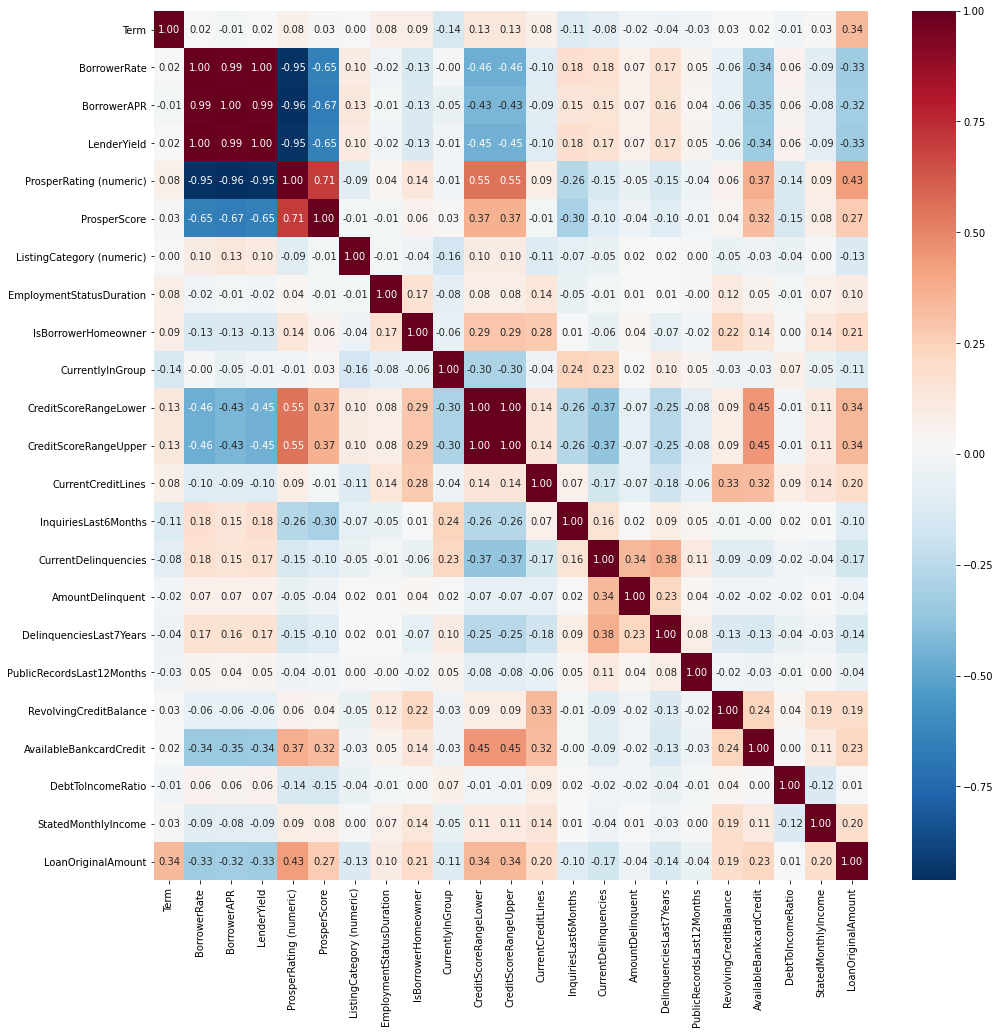

In [9]:
#from seaborn import heatmap
fig, ax = plt.subplots(figsize=(16,16))
ax = sb.heatmap(corr_big, fmt='.2f', annot=True, ax=ax, cmap='RdBu_r')
fig.savefig('corr.png', dpi=300, bbox_inches=None);

In [35]:
# drop redundant features
# BorrowerAPR is redundant. BorrowerAPR and BorrowerRate are very closely related.
# Other features against them are also very closely related.
# CreditScoreRangeLower is redundant. It and CreditScoreRangeUpper are related
# other features against them are exactly similarly related
# CurrentlyInGroup since it looks like it has no bearing on BorrowerRate and ProsperRating
# LenderYield is redundant BorrowerRate
df.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [36]:
#df = pld.copy()

In [37]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [41]:
from datetime import datetime
df['ListingCreationDate'] = df.ListingCreationDate.astype('datetime64[ns]')
df['DateCreditPulled'] = df.DateCreditPulled.astype('datetime64[ns]')
df['FirstRecordedCreditLine'] = df.FirstRecordedCreditLine.astype('datetime64[ns]')
df['LoanOriginationDate'] = df.LoanOriginationDate.astype('datetime64[ns]')
df['ClosedDate'] = df.ClosedDate.astype('datetime64[ns]')

In [42]:
df[['ListingCreationDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate', 'ClosedDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ListingCreationDate      113937 non-null  datetime64[ns]
 1   DateCreditPulled         113937 non-null  datetime64[ns]
 2   FirstRecordedCreditLine  113240 non-null  datetime64[ns]
 3   LoanOriginationDate      113937 non-null  datetime64[ns]
 4   ClosedDate               55089 non-null   datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 4.3 MB


In [43]:
# get year month day yymmdd
# when subtracting 2 dates, it will give timedelta in days only
def get_yymmdd(date):
    return date.replace(hour=0, minute=0, second=0, microsecond=0)

In [53]:
# all the timedelta from ListingCreationDate
df['daysSinceDCP'] = df.ListingCreationDate.apply(get_yymmdd) - df.DateCreditPulled.apply(get_yymmdd)
df['daysSinceFRCL'] = df.DateCreditPulled.apply(get_yymmdd) - df.FirstRecordedCreditLine.apply(get_yymmdd)
df['daysSinceLOD'] = df.ListingCreationDate.apply(get_yymmdd) - df.LoanOriginationDate.apply(get_yymmdd)

In [54]:
# convert timedelta to number
df['daysSinceDCP'] = df.daysSinceDCP / np.timedelta64(1, 'D') # astype('int64')
df['daysSinceFRCL'] = df.daysSinceFRCL / np.timedelta64(1, 'D') # astype('int64')
df['daysSinceLOD'] = df.daysSinceLOD / np.timedelta64(1, 'D') # astype('int64')

In [55]:
df[['ListingCreationDate', 'daysSinceDCP', 'daysSinceFRCL', 'daysSinceLOD']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ListingCreationDate  113937 non-null  datetime64[ns]
 1   daysSinceDCP         113937 non-null  float64       
 2   daysSinceFRCL        113240 non-null  float64       
 3   daysSinceLOD         113937 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.5 MB


In [56]:
df[['ListingCreationDate', 'daysSinceDCP', 'daysSinceFRCL', 'daysSinceLOD']].head(20)

,ListingCreationDate,daysSinceDCP,daysSinceFRCL,daysSinceLOD
0,2007-08-26 19:09:29.263,0.0,2145.0,-17.0
1,2014-02-27 08:28:07.900,0.0,6555.0,-4.0
2,2007-01-05 15:00:47.090,3.0,1620.0,-12.0
3,2012-10-22 11:02:35.010,0.0,10829.0,-10.0
4,2013-09-14 18:38:39.097,0.0,3494.0,-6.0
5,2013-12-14 08:26:37.093,0.0,14898.0,-10.0
6,2013-04-12 09:52:56.147,0.0,4578.0,-6.0
7,2013-05-05 06:49:27.493,0.0,5183.0,-8.0
8,2013-12-02 10:43:39.117,0.0,7550.0,-10.0
9,2013-12-02 10:43:39.117,0.0,7550.0,-10.0


In [57]:
# LoanOriginationDate is being dropped it is after determination of rate
df[['ListingCreationDate', 'daysSinceDCP', 'daysSinceFRCL', 'daysSinceLOD']].describe()

,daysSinceDCP,daysSinceFRCL,daysSinceLOD
count,113937.000000,113240.000000,113937.000000
mean,-0.308855,6089.538167,-12.340969
std,27.667517,2910.223602,27.463922
min,-1085.000000,7.000000,-1095.000000
25%,0.000000,4104.000000,-13.000000
50%,0.000000,5709.000000,-9.000000
75%,0.000000,7721.000000,-5.000000
max,1456.000000,23023.000000,-1.000000


<AxesSubplot:xlabel='daysSinceFRCL', ylabel='Count'>

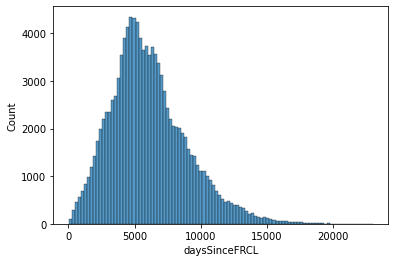

In [58]:
sb.histplot(data=df, x='daysSinceFRCL', color=pleasant, bins=100)

In [59]:
df.ListingKey.nunique()

113066

In [60]:
df.LoanNumber.nunique()

113066

In [61]:
df.LoanKey.nunique()

113066

In [ ]:
sb.regplot(x='BorrowerRate', y='CurrentlyInGroup', data=df.sample(frac=.25), logistic=True, y_jitter=.03)

In [ ]:
sb.regplot(x='ProsperRating (numeric)', y='CurrentlyInGroup', data=df.sample(frac=.25), logistic=True, y_jitter=.03)

In [ ]:
# after creating a timedelta column (to integer), check if it makes a difference in borrowerrate
print(sum(n >= 0 for n in df.dd_int), sum(n < 0 for n in df.dd_int))

In [ ]:
sb.regplot(x='dd_int', y='BorrowerRate', data=df)

In [ ]:
# create a new column that saves boolean of sign
ddvc['d_sign'] = np.sign(ddvc.index)

In [ ]:
ddvc.info()

In [ ]:
ddvc.d_sign.value_counts()

In [ ]:
print(list(pld.columns))

In [ ]:
# there are 113937 records and 113066 unique listing keys. I will verify quickly if these are duplicates.
key_counts = pld.ListingKey.value_counts()
key_counts

In [ ]:
key_counts.value_counts()

In [ ]:
dup_idx = pld[pld.ListingKey.duplicated()]['ListingKey']
print(type(dup_idx))
print(dup_idx[:10])

In [ ]:
tt = dup_idx.tolist()
tt
len(tt)

In [ ]:
dup_listing_idx = set(dup_idx.tolist())
len(dup_listing_idx)

### Note:

According to Prosper variable definitions, ListingKey is supposed to be UNIQUE. dup_listing_idx are the listing keys that have duplicates. I will remove their duplicates but keep the first. I will then assign a -1 in their ProsperScore to mark them as to be "corrected"

In [ ]:
sub_cols = ['ProsperScore', 'ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']

In [ ]:
# examine one ListingKey and see in which column the listings differ
check_dups_df = pld[pld.ListingKey == '17A93590655669644DB4C06']
# make sure that it is NOT spacing that makes a difference in non-duplicates
check_dups_df = check_dups_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#duplicaterows = check_dups_df[check_dups_df.duplicated(sub_cols)] 
#temp_df.to_csv('dupes.csv', index=None)

In [ ]:
check_dups_df

In [ ]:
temp_cols = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']

In [ ]:
# Exclude the column ProsperScore, then see if the duplicates are dropped
check_dups_df.drop_duplicates(subset=temp_cols, inplace=True, keep='first')
check_dups_df

### Notes:

The rows above were identical except in column ProsperScore.
Although initially since they were inconsistently assigned, I thought they should be dropped.
I think now I will take the opportunity to see if I can correct these "errors"


In [ ]:
pld.corr()

In [ ]:
# there is some strange inconsistency in way prosper give prosperscore.
# for example, the loan with listingkey 17A93590655669644DB4C06 has exactly the data in all the other columns
# EXCEPT for prosperScore which had 4, 8, 7, 10, 5, 6 in content. BIZARRE!!
# For that reason, I will drop the column prosperscore, and then drop_duplicates
len(temp_cols)

In [ ]:
#tpld = pld.drop(['ProsperScore'], axis=1)
tpld = pld.copy()

In [ ]:
tpld.shape

In [ ]:
# trim spaces again to make sure it is not spaces that make a difference
tpld = tpld.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

## Remove Duplicates

### Note:

Before I remove the duplicated rows, I would like to record the range of prosperScores that the listing keys were assigned

In [ ]:
# dup_listing_idx contains the keys that have duplicates: tpld.loc[dup_listing_idx]
lk_ps_df = tpld[tpld.ListingKey.isin(dup_listing_idx)][['ListingKey', 'ProsperScore']]

In [ ]:
lk_ps_df = lk_ps_df.sort_values(by=['ListingKey', 'ProsperScore'])
lk_ps_df.count()

In [ ]:
# create a new column ProsperScoreRange and set index to ListingKey
lk_ps_df['ProsperScoreRange'] = None
lk_ps_df = lk_ps_df.set_index(['ListingKey'])

In [ ]:
# create a dictionary with key as ListingKey and the ProsperScore range as value
psr_dict = {}
for lk in dup_listing_idx:
    psr_dict[lk] = lk_ps_df.loc[lk]['ProsperScore'].tolist()
list(psr_dict.items())[:10]

In [ ]:
# place all the new range value from the dictionary into dataframe
for k, v in psr_dict.items():
    vstr = [str(i) for i in v] # convert the list into strings
    yy = ",".join(vstr)
    lk_ps_df.loc[k, 'ProsperScoreRange'] = yy

In [ ]:
lk_ps_df.head(10)

In [ ]:
# reset the index then drop the column ProsperScore from lk_ps_df
lk_ps_df.reset_index(inplace=True)
lk_ps_df = lk_ps_df.drop(['ProsperScore'], axis=1)

In [ ]:
lk_ps_df.count()

In [ ]:
# now remove all the duplicates on ListingKey
lk_ps_df.drop_duplicates(subset=['ListingKey'], inplace=True, keep='first')

In [ ]:
lk_ps_df.count()

### Note:
The count above matches the count of dup_listing_idx

In [ ]:
# quickly examine the listing keys in my working dataframe tpld
# the temp_cols list is the list of columns without ProsperScore
duplicaterows = tpld[tpld.duplicated(temp_cols)]
duplicaterows.ListingKey.value_counts()

In [ ]:
# backup tpld
tpld_backup = tpld.copy()

In [ ]:
# drop all the duplicates in tpld based on temp_cols subset (i.e., without ProsperScore)
tpld.drop_duplicates(subset=temp_cols, inplace=True, keep='first')

In [ ]:
# merge the two df tpld and lk_ps_df on ListingKey
tpld = pd.merge(tpld, lk_ps_df, on=['ListingKey'], how='left')
tpld.head()

In [ ]:
new_key_counts = tpld.ListingKey.value_counts()
new_key_counts.value_counts()

In [ ]:
tpld.shape

In [ ]:
tpld.ProsperScore.value_counts()

In [ ]:
tpld['ProsperRating (Alpha)'].value_counts()

In [ ]:
tpld['ProsperRating (numeric)'].value_counts()

In [ ]:
tpld['CreditGrade'].value_counts()

### Notes:

ProsperRating alpha and numeric match exactly in count. CreditGrade has the same letter grades as ProsperRating. Prosper's variable definitions did not specify if the grading system in ProsperRating and CreditGrade. I am hoping that upon analysis below that it confirms that they are the same grading system.

In [ ]:
pld.shape[0] - tpld.shape[0]

In [ ]:
#select_features = ['EmploymentStatus', 'LoanOriginalAmount', 'CreditScoreRangeUpper', 'LoanStatus', 'BorrowerRate', 'StatedMonthlyIncome', 'ProsperRating (numeric)', 'ListingCategory (numeric)', 'IsBorrowerHomeowner']
select_features = ['ListingKey', 'EmploymentStatusDuration', 'EmploymentStatus', 'LoanOriginalAmount', 'CreditGrade', 'ProsperRating (numeric)', 'ProsperScore', 'ProsperScoreRange', 'BorrowerRate', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'IsBorrowerHomeowner', 'CurrentCreditLines', 'AvailableBankcardCredit']
df = tpld[select_features]
df.info()

In [ ]:
df.shape

In [ ]:
# There is a lot of nulls. what to do?
# drop listingnumber, borrowerapr (seems similar to borrowerrate), Investmentfromfriendscount, investmentfromfriendsamount,
# percentfunded (nearly 100%)
df.corr()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
print(list(df.columns))

### What is the structure of your dataset?

The original dataset had (113937, 81). After discovering that Prosper had inconsistencies in using the feature ProsperScore, I added a new column called ProsperScoreRange. I then dropped all the duplicated rows but keeping the first among the duplicated. The new shape is (113937, 82). With the selected features, the final shape is (113066, 14)

### What is/are the main feature(s) of interest in your dataset?

ProsperRating and BorrowerRate features are interesting. I would like to see if it's predictable based on some features. The BorrowerRate is highly correlated to ProsperRating so I believe BorrowerRate is derivative. I would like to keep track of these 2 features based on the features below.

Initially, I was interested in predicting ProsperRating. It is however highly correlative to BorrowerRate. But some samples do not have ProsperRating but they all have BorrowerRate. Ultimately if this is a automation or machine learning problem. If I choose to predict ProsperRating, it would be a classification problem. If I choose BorrowerRate, it would be a regression problem. Since it is not the purpose of this project, I will leave the automation problem for a future task.

I will attempt to correct the ProsperScore on those index that had duplicates in exploration.

Since ProsperRating and CreditGrade are mutually exclusive, I will also combine them in a new column. They both have BorrowerRate. So I will examine if they correlate with BorrowerRate.

I will examine in bivariate section how CreditGrade's relationship to BorrowerRate compares with that of PropserRating.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will investigate the following features.

'ListingKey', 'EmploymentStatusDuration', 'EmploymentStatus', 'LoanOriginalAmount', 'CreditGrade', 'ProsperRating (numeric)', 'ProsperScore', 'ProsperScoreRange', 'BorrowerRate', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'IsBorrowerHomeowner', 'CurrentCreditLines', 'AvailableBankcardCredit'

And keep track of these 2 features against the features above.
'BorrowerRate', 'ProsperRating (numeric)'

I retained the ListingKey so I can continue to process below.

In [ ]:
df = df.rename(columns={'ProsperRating (numeric)': 'ProsperRating'})

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [ ]:
# set a base color palette
pleasant = sb.color_palette()[0]

In [ ]:
#fig, ax = plt.subplots(figsize=(10,8))
#df.EmploymentStatus.plot(kind='bar', ax=ax)
#plt.show();
plt.figure(figsize=(10,8))
sb.countplot(data = df, x='EmploymentStatus', color=pleasant)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Employment Status Count');

### Notes: 

Although I will compare in bivariate analysis later the relationship between EmploymentStatus and EmloymentStatusDuration, I will do them here one-by-one first.

Nearly all of the borrowers are employed. Very few borrowers have "Not employed" status. It would be interesting to see what other factors Prosper used to extend loans to the unemployed borrowers.

In [ ]:
plt.figure(figsize=(10,8))
sb.histplot(data=df, x='EmploymentStatusDuration', color=pleasant, bins=100)
plt.xlabel('Employment Duration in months')
plt.title('Employment Duration in months')

### Notes:

It is extremely right-skewed. Most people worked below 100 months in their current employment status

In [ ]:
plt.figure(figsize=(10,8))
sb.histplot(data=df, x='EmploymentStatusDuration', color=pleasant, bins=100)
plt.xscale('log')
plt.xlabel('Employment Duration in months')
plt.title('Employment Duration in months');

### Notes:

I am not sure if this transformation elucidated the right-skewedness of the distribution.

In [ ]:
sb.countplot(data=df, x='ProsperRating', color=pleasant)
plt.title('ProsperRating Count');

### Notes:

ProsperRating is normally distributed.

In [ ]:
sb.boxplot(data=df, x='ProsperRating')
plt.title('Another view of the obvious');

### Notes:

This strongly confirms the normal distribution.

In [ ]:
sb.countplot(data=df, x='ProsperScore', color=pleasant)
plt.title('ProsperScore Count')

#### Note:

Both ProsperScore and ProsperRating seem to be ordinal. It is not clear to me whether bigger score is better or worse. I will examine further. However, they both seem to have a normal distribution. The Prosper Loan Dictionary did not specify which one is best.

In [ ]:
plt.figure(figsize=(10,8))
sb.histplot(data=df, x='BorrowerRate', color=pleasant)
plt.title('Distribution of BorrowerRate');

### Notes:

This distribution is all over the place. There wild peaks around .15, .25 and .35, and a especially huge one around .32.

In [ ]:
plt.figure(figsize=(10,8))
sb.distplot(x=df.BorrowerRate, color=pleasant)
plt.title('Distribution of Borrower Rate with kde');

### Notes:

There's a lot of humps here. multimodal. It seems most loans had borrower rate between .1 and .2. However, there are also many between .2 and .3 and a really huge hump just above .3.

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
#, 
df.hist(['LoanOriginalAmount', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'CurrentCreditLines', 'AvailableBankcardCredit'], ax=ax);

### Notes:

This is a quick series of distribution plots:
- Most `LoanOriginalAmount` are below 10k, with bumps at increments of 5000.
- `CreditScoreRangeUpper` range from 450 to 900
- Nearly all borrowers have `CurrentDelinquencies` below 10.
- Most borrowers have `CurrentCreditLines` between 5 and 15.
- Nearly all borrowers have `AvailableBankcardCredit` below 10k

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(data=df, x='CurrentCreditLines', color=pleasant)
plt.xticks(rotation=90)
plt.title('Number of Current Credit Lines');

### Notes:

Before 20, `CurrentCreditLines` looks to have a normal distribution.

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(data=df, x='CurrentCreditLines', color=pleasant)
plt.xlim(0,20)
plt.xticks(rotation=90)
plt.title('Number of Current Credit Lines');

### Notes:

It is slightly right-skewed with the mean just slightly higher than the median. There are some big outliers. It looks almost normal when I limited the x-axis.

In [ ]:
print(f"median: {df.CurrentCreditLines.median()}, mean: {df.CurrentCreditLines.mean()}")

In [ ]:
plt.figure(figsize=(10,8))
sb.histplot(data=df, x='LoanOriginalAmount', color=pleasant, bins=100)
plt.title('Distribution of Loan Amounts');

### Notes:

As I suspected above, the loan amounts had peaks around increments of 5000.

In [ ]:
plt.figure(figsize=(10,8))
sb.distplot(x=df.LoanOriginalAmount, color=pleasant)
plt.title('Distribution of Loan Amount with kde');

### Notes:

I do not know what to make of this yet. The bumps look like the bank preferred to lend in increments of 5000. Big bump at 5000, then bumps at 10000, 15000, 20000, and 25000 (perhaps even at 30000 and 35000)

In [ ]:
sb.countplot(data=df, x='IsBorrowerHomeowner', color=pleasant);

### Notes:

There are about as many homeowners than not. This is nearly uniform.

In [ ]:
df.IsBorrowerHomeowner.value_counts()

In [ ]:
plt.figure(figsize=(10,8))
sb.histplot(data=df, x='CreditScoreRangeUpper', color=pleasant, bins=100)
plt.xlim(625,800)
plt.title('Distribution of Credit Scores');

#### Notes:

The credit score distribution looks almost normal with the mean and the median at around 700.

I will assume that CreditGrade has the same legend as ProsperRating which is 

The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

I will create a numeric column based on CreditGrade

## Convert CreditGrade to number rating

In [ ]:
df.CreditGrade.value_counts()

pr_dict = {'NC': 0, 'HR': 1, 'E': 2, 'D': 3, 'C': 4, 'B': 5, 'A': 6, 'AA': 7}

df.CreditGrade.replace(pr_dict, inplace=True)

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(data = df, x='CreditGrade', color=pleasant)
#plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Credit Grade Count');

### Notes:

If we discount 0 rating, `CreditGrade` looks to be almost normal.

In [ ]:
df[['CreditGrade', 'ProsperRating']].describe()

#### Notes:

If you discount, the 0 rating it looks normal. And the distribution is comparable to ProsperRating. This confirms that the alphabetic rating used in ProsperRating is the same as the alphabetic rating used in CreditGrade.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

My variable of interest the BorrowerRate since all the records have that. BorrowerRate has a lot of peaks. ProsperRating has a normal distribution. ProsperScore is not as normal as ProsperRating. Nevertheless, I will do some more cleaning below after I do some bivariate analysis. I attempted to do a transformation on employment duration. It confirmed that most borrowers worked at least 2 years.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

As I mentioned that there were some ListingKeys that had duplicates that only differed in their ProsperScore content. I believe these were clerical errors. I kept one of each duplicated Listing. But I created a new column called ProsperScoreRange so that I can examine the "incorrect" ProsperScores after I impute values into ProsperScore based on ProsperRating.

I converted the CreditGrade column to the numerical rating described in the description of ProsperRating in the Prosper's variable definitions. If you discount the 0 rating, CreditGrade looks normal. And the distribution is comparable to ProsperRating. This confirms that the alphabetic rating used in ProsperRating is the same as the alphabetic rating used in CreditGrade.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
# Now I will create a new column combining ProsperRating and CreditGrade since they are mutually exclusive
# But first I would like to confirm that CreditGrade's relationship to BorrowerRate is similar to that of ProsperRating.
sb.catplot(data=df, x='CreditGrade', y='BorrowerRate', color=pleasant, alpha=0.1);

### Notes:

The relationship density between `BorrowerRate` and `CreditGrade` trends negatively.

In [ ]:
sb.catplot(data=df, x='ProsperRating', y='BorrowerRate', color=pleasant, alpha=0.1);

### Notes:

Similar to above, the relationship density between `BorrowerRate` and `ProsperRating` trends negatively.

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sb.regplot(x='ProsperRating', y='BorrowerRate', ax=ax1, data=df)
sb.regplot(x='CreditGrade', y='BorrowerRate', ax=ax2, data=df)

### Notes:

Side-by-side, it is clearer that they are similary correlated to `BorrowerRate`. It warrants that they be combine into one column. Reminder that they are mutually exclusive CreditGrade (pre mid 2009), ProsperRating (post mid 2009).

In [ ]:
sb.heatmap(df.corr(), fmt='.2f', annot=True, cmap='RdBu_r')

### Notes:

ProsperRating and ProsperScore are positively correlative

ProsperScore and ProsperRating are highly negatively correlative with BorrowerRate. Since all loans have a BorrowerRate, I believe that these 3 features are co-determined based on all the other features.

The heatmap confirms that ProsperRating and CreditGrade are in fact mutually exclusive. Their graphs also are comparable agains BorrowerRate. I will now combine ProsperRating and CreditGrade in one column.

## Combine CreditGrade and ProsperRating into one column

In [ ]:
df[['CreditGrade', 'ProsperRating']].notnull().sum()

In [ ]:
df['ProsperRatingGrade'] = df['ProsperRating']

In [ ]:
df.ProsperRatingGrade.update(df['CreditGrade'])
df.ProsperRatingGrade.isnull().sum()

### Notes:
All 113066 records accounted for.

In [ ]:
df[['CreditGrade', 'ProsperRating', 'ProsperRatingGrade']].sample(1000).head(20)

#### Notes:

I successfully combined the CreditGrade and ProsperScore. I will now do more bivariate analysis

In [ ]:
sb.pairplot(df[['EmploymentStatusDuration', 'EmploymentStatus', 'LoanOriginalAmount', 'ProsperRatingGrade', 'BorrowerRate', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'IsBorrowerHomeowner', 'CurrentCreditLines', 'AvailableBankcardCredit']])

### Notes:

This is not so readable. But this quickly gives me hints on how to plot the relationships better.

In [ ]:
sb.catplot(data=df, x='ProsperRatingGrade', y='BorrowerRate', color=pleasant, alpha=0.1);

### Notes:

`ProsperRatingGrade` is the column that combines `CreditGrade` and `ProsperRating`. Obviously, the density and trend of relationship of each of those features against `BorrowerRate`.

In [ ]:
sb.lmplot(data=df.sample(11000), x='ProsperRatingGrade', y='BorrowerRate', x_jitter=.05)

### Notes:

This shows that the higher the ProsperRatingGrade the lower BorrowerRate.

## Correcting ProsperScore

In [ ]:
sb.catplot(data=df, x='ProsperRating', y='ProsperScore', color=pleasant, alpha=0.009)

### Notes:

Is it justifiable to use `ProsperRating` to correct `ProsperScore`? The density hints at a positive correlation.

In [ ]:
sb.lmplot(data=df.sample(11000), x='ProsperRating', y='ProsperScore')

## Notes:

The line shows a correspondence between `ProsperRating` and `ProsperScore`.

In [ ]:
# what is the average score in each rating
# get a temporary df without the dup IDs
temp_df = df[~df.ListingKey.isin(dup_listing_idx)]

In [ ]:
temp_df.shape

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.figure(figsize=(10,8))
sb.lineplot(data=temp_df, x='ProsperRating', y='ProsperScore', marker='o')
ax.set_yticks(np.arange(11))
plt.title('ProsperScore against ProsperRating');

### Notes:

The graph did not really change much. But I will use the opportunity to "correct" ProsperScore based on ProsperRating to get to know the data better

In [ ]:
grptemp = temp_df.groupby('ProsperRating')

In [ ]:
grptemp.mean()

In [ ]:
gm = grptemp.mean()
print(gm.ProsperScore.apply(np.ceil))

In [ ]:
grptemp.median()

### Note:

I will use the mean scores obtained above to "correct" the ProsperScore in those duplicated indices with varying ProsperScore. Although I do not believe that this corrects the ProsperScore, I will use it for now. I will try to confirm by other means if my simple "correction" based on ProsperRating approximates truth. I did save the original ProsperScores in a new column called ProsperScoreRange.

In [ ]:
# work with grouped mean dataframe and reset index
# then create a dictionary with ProsperRating as key and ProsperScore as value from mean() dataframe
gm = gm.reset_index() # necessary to use ProsperRating again as a column
p_score = dict(zip(gm.ProsperRating, gm.ProsperScore.apply(np.ceil)))
p_score

In [ ]:
#df = work_df.copy()

In [ ]:
work_df = df.copy() # just another backup of working dataframe

In [ ]:
# with working dataframe df, for each Listing key in dup_listing_idx
# change the ProsperScore to the corresponding one in the ps_score dictionary
# I tried the declarative way below. But I experimented too much. I will use procedural way instead.
#work_df.loc[work_df.ListingKey.isin(dup_listing_idx), 'ProsperScore'] = work_df.ProsperScore.map(p_score)
for idx in dup_listing_idx:
    pr = float(df[df.ListingKey==idx]['ProsperRating']) # get the ProsperRating to use for dict lookup
    df.loc[(df.ListingKey==idx), 'ProsperScore'] = p_score.get(pr)

In [ ]:
#peek_df = work_df[work_df.ListingKey.eq('09233589620788733CFB8CE')]
peek_df = df[df.ListingKey.isin(dup_listing_idx)]
peek_df[['CreditGrade', 'ProsperRating', 'ProsperScore', 'ProsperRatingGrade', 'ProsperScoreRange']].head(20)

In [ ]:
plt.figure(figsize=(10,8))
sb.lineplot(data=df, x='ProsperRating', y='ProsperScore')
plt.title('Correlation between ProsperRating and ProsperScore (with ProsperScore corrections)');

### Notes:
Again this is showing the same lineplot but with ProsperScore corrections. The visuals should not have changed since I am using `ProsperRating` to correct `ProsperScore`.

In [ ]:
sb.lmplot(data=df.sample(10000), x='ProsperRating', y='BorrowerRate', x_jitter=.05)
#sb.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

### Notes:

I have seen this plot already but as regplot. However, this `lmplot` is computationally expensive even with a fraction of the data.

In [ ]:
t_cols = list(df.columns)
print(t_cols)

In [ ]:
t_cols = ['BorrowerRate', 'LoanOriginalAmount', 'CreditScoreRangeUpper', 'ProsperRatingGrade']

In [ ]:
sb.pairplot(df[t_cols].sample(10000), kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

### Notes:

- `ProsperRatingGrade` is positively correlated with `CreditScoreRangeUpper`.
- `LoanOriginalAmount` is positively with `CreditScoreRangeUpper`
- This provides information on which relationships to focus on.

In [ ]:
sb.catplot(data=df, x='ProsperRatingGrade', y='BorrowerRate', color=pleasant, alpha=0.1)

### Notes:

As I mentioned before it didn't make a difference in the big picture.

I drew the graph first with the line and then a form of a scatterplot indicating density of points. It is clear to me now that `ProsperRating` is ordinal. The higher the `ProsperRating` the lower the BorrowerRate.

In [ ]:
temp_df = df[['BorrowerRate', 'ProsperRatingGrade']]
temp_df.isnull().sum()

In [ ]:
temp_df = temp_df.dropna()
temp_df.isnull().sum()

In [ ]:
temp_df.shape

In [ ]:
sb.lmplot(data=temp_df.sample(10000), x='ProsperRatingGrade', y='BorrowerRate', x_jitter=.05, line_kws={'color':'red'})
plt.title('Borrower Rate against Prosper Rating');

### Notes:

I used a red line to show better the trend between `ProsperRatingGrade` and `BorrowerRate`.

In [ ]:
sb.catplot(data=df, x='EmploymentStatus', y='EmploymentStatusDuration', color=pleasant, alpha=0.1)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Employment Duration vs Status');

### Notes:
I thought there might be a relationship between emploment status and duration. I don't see much.

In [ ]:
sb.catplot(data=df, x='EmploymentStatus', y='BorrowerRate', color=pleasant, alpha=0.1)
plt.xticks(rotation=45, horizontalalignment='right');

### Notes:

With the relationship more dense in the first 5 statuses, Prosper had a preference to lend to the employed. However, the rates varied just as widely regardless of employment status.

In [ ]:
plt.figure(figsize=(10,8))
sb.boxplot(data=df, x='EmploymentStatus', y='BorrowerRate', color=pleasant)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Borrower rates among employment statuses');

### Notes:

As mentioned above, the rates did vary regardless of employment status. But what is clear here is that the employed enjoyed lower rates on average.

In [ ]:
df.EmploymentStatus.value_counts()

### Notes:

there's a definite range of rates given to the first 5 statuses.

In [ ]:
sb.heatmap(df.corr(), fmt='.2f', annot=True, cmap='RdBu_r')

### Notes:

- Mutual exclusivity of `CreditGrade` and `ProsperRating` is quite evident.
- High correlation between `ProsperRating` and `CreditGrade` hints at independence.
- Low correlation between other features need to be examined more closely.

In [ ]:
plt.figure(figsize=(10,8))
sb.lmplot(data=df.sample(frac=.25), x='LoanOriginalAmount', y='BorrowerRate', line_kws={'color': 'red'});

### Notes:
- There seems to be a general lowering of rates as `LoanOriginalAmount` increases.
- Most loans are below 15k.
- After 15k, there are dense periods at increment of 5000.

In [ ]:
plt.figure(figsize=(10,8))
sb.lmplot(data=df.sample(frac=.25), x='CreditScoreRangeUpper', y='BorrowerRate', line_kws={'color': 'red'});

### Notes:
- The trend is that the higher the credit score, the lower the `BorrowerRate`.
- Nearly all borrowers had credit scores above 400.
- This could be better plotted by limiting the x axis.

In [ ]:
df.CreditScoreRangeUpper.isnull().sum()

In [ ]:
df.CreditScoreRangeUpper.describe()

#### Notes:

- With those that had a credit scores, it looks that the higher the credit score the better the BorrowerRate.
- A minimum of 19 in Credit Score is probably an clerical error.
- Prosper only lent money to people with credit scores above 400.

In [ ]:
# computationally expensive using sample

sb.lmplot(x="BorrowerRate", y="IsBorrowerHomeowner", data=df.sample(10000), logistic=True, y_jitter=.03);

### Notes:

It looks as if they disbursed funds regardless of homeownership. However, it benefits that you are a homeowner in that the BorrowerRate is lower if you are a homeowner

In [ ]:
plt.figure(figsize=(10,8))
sb.lmplot(data=df.sample(frac=.25), x='CurrentCreditLines', y='BorrowerRate', line_kws={'color': 'red'});

### Notes:
- Most borrowers had credit lines below 25.
- The trend is that the more credit line a borrower had, the lower the `BorrowerRate`.

In [ ]:
# ProsperRatingGrade vs homeownership
plt.figure(figsize =(10,8))
sb.countplot(data=df, x='ProsperRatingGrade', hue='IsBorrowerHomeowner');

### Notes:

Homeownership seemed to matter less as the ProsperRatingGrade got higher. Prosper Rating seemed to matter more

In [ ]:
plt.figure(figsize=(10,8))
sb.boxplot(data=df, x='CreditGrade', y='BorrowerRate', color=pleasant)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('BorrowerRate against CreditGrade');

### Notes:

Here is another look at `CreditGrade` vs `BorrowerRate`. The mean and the quartiles of `BorrowerRate` trend down as rating increases.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- BorrowerRate correlates with CreditScoreRangeUpper: the better the score the lower the rate.
- BorrowerRate correlates with ProsperRating: the higher the rating the lower the rate.
- BorrowerRate slightly correlates with loan amount: the higher the amount the lower the rate. that is interesting.
- It looks as if they disbursed funds regardless of homeownership. However, it benefits that you are a homeowner in that the BorrowerRate is lower if you are a homeowner.
- Most borrowers have fewer than 25 credit lines. But the tendency is that the more credit line you have, the lower the BorrowerRate.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- CreditScoreRangeUpper is positively correlated with LoanOriginalAmount.
- Homeownership seemed to matter less as the ProsperRatingGrade got higher. Prosper Rating seemed to matter more.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
g = sb.FacetGrid(data=df, height=6, col='ProsperRatingGrade', col_wrap=2)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend()
g.fig.suptitle('Relationship between Loan Amount and BorrowerRate broken down by Prosper Rating Grade');

### Notes:

It looks that the higher Prosper Rating Grade have the lowest range of borrower rates.

In [ ]:
g = sb.FacetGrid(data=df, height=6, col='ProsperRatingGrade', col_wrap=4)
g.map(sb.regplot, 'CreditScoreRangeUpper', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1}, line_kws={'color':'red'});
g.add_legend()
g.fig.suptitle('Relationship between Credit Score and BorrowerRate broken down by Prosper Rating Grade');

## Notes:

Credit Score made more of a difference in the big picture with borrowers with Prosper Rating grade of 4 or below.

In [ ]:
g = sb.FacetGrid(data=df, height=6, col='ProsperRatingGrade', col_wrap=4)
g.map(sb.regplot, 'AvailableBankcardCredit', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend()
g.fig.suptitle('Relationship between Available Bank Credit and BorrowerRate broken down by Prosper Rating Grade');

### Notes:

Interestingly, people with Prosper Rating of 5 or higher had a negatively correlationship between their rate and available bank credit. With those with rating of 4 or below, the relationship between rate and available credit is positively correlated. The higher available bank credit the lower the borrower rate. But if the borrower's rating is low, the higher the borrower rate is as bank credit increases. Again this might have the effect of other features which are causing the rating to lower.

In [ ]:
# see the relationship of credit scores broken down # currentCreditLines CurrentDelinquencies
g = sb.FacetGrid(data=df, height=6, col='ProsperRatingGrade', col_wrap=4)
g.map(sb.regplot, 'CurrentDelinquencies', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1}, line_kws={'color':'red'});
g.add_legend()
g.fig.suptitle('Relationship between Available Bank Credit and BorrowerRate broken down by Prosper Rating Grade');

### Notes:
CurrentDelinquiencies seem to have an effect on BorrowerRate. Generally, the more deliquencies the higher the BorrowerRate. Interestingly, at low grade, the BorrowerRate seems to go lower. I think this is just the effect of having low ProsperRating.

In [ ]:
g = sb.FacetGrid(data=df, height=6, col='ProsperRatingGrade', col_wrap=4)
g.map(sb.regplot, 'CurrentCreditLines', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1}, line_kws={'color':'red'});
g.add_legend()
g.fig.suptitle('Relationship between number of credit lines and BorrowerRate broken down by Prosper Rating Grade');

### Notes:

Broken down by prosper rating, the trend between `BorrowerRate` and number of credit lines are generally flat. However, at a rating of **1**, the relationship between `BorrowerRate` and `CurrentCreditLines` is positive, i.e., at that low rating, the more credit lines the higher the rate. Interesting!

In [ ]:
g = sb.FacetGrid(data=df, height=6, col='CreditGrade', col_wrap=4)
g.map(sb.regplot, 'CreditScoreRangeUpper', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1}, line_kws={'color':'red'});
g.add_legend()
g.fig.suptitle('Relationship between pre-2009 credit grade and BorrowerRate broken down by Grade');

### Notes:
This graph and the graph below are probably the most revealing during this whole investigation. This is `BorrowerRate` against credit scores broken down by each `CreditGrade`. This is where I discovered that `CreditGrade` is tied very closely to `CreditScoreRangeUpper`. Note the range of credit scores per grade.

In [ ]:
g = sb.FacetGrid(data=df, height=6, col='ProsperRating', col_wrap=4)
g.map(sb.regplot, 'CreditScoreRangeUpper', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1}, line_kws={'color':'red'});
g.add_legend()
g.fig.suptitle('Relationship between post-2009 Prosper Rating and BorrowerRate broken down by Grade');

### Notes:

This is extremely interesting. The pre-2009 CreditGrade is very closely tied to the CreditScoreRangeUpper. On the other hand, post-2009 was less dependent on Credit Score.

This puts to question of combining CreditGrade and ProsperRating into one column.

However, upon looking at range of BorrowerRate, the density are comparable.

#### Rough visual assessment of range of BorrowerRate by Grade

| Grade | CreditGrade | ProsperRating |
|-------|-------------|---------------|
| 0     | 0           | 0             |
| 1     | .24 - .26   | .32           |
| 2     | .22 - .32   | .28           |
| 3     | .21         | .24 - .26     |
| 4     | .16 and .18 | .18 - .22     |
| 5     | .14         | .16           |
| 6     | .1 - .15    | .12           |
| 7     | .07 - .1    | .07           |


In [ ]:
#fig, ax = plt.subplots(1, 2, figsize=(12, 10))
#sb.boxplot(x='CreditGrade', y='BorrowerRate', data=df, ax=[1, 1])
#sb.boxplot(x='ProsperRating', y='BorrowerRate', data=df, ax=[1, 2])

In [ ]:
# create a boolean mask IsCG IsPR
# create a column IsPR
wdf = df.copy()

In [ ]:
wdf['IsPR'] = np.where(wdf.ProsperRating.notnull(), 1, None) # column IsPR
wdf['IsCG'] = np.where(wdf.CreditGrade.notnull(), 2, None) # column 
wdf['post2009'] = wdf['IsPR']

In [ ]:
wdf.post2009.update(wdf['IsCG'])
wdf.post2009.isnull().sum()

In [ ]:
wdf[['IsPR', 'ProsperRating', 'IsCG', 'CreditGrade', 'post2009']].sample(1300).head(20)

In [ ]:
wdf = wdf.dropna(subset=['post2009'])
wdf.isnull().sum()

In [ ]:
wdf.post2009.replace(2, 0, inplace=True)

In [ ]:
wdf[['IsPR', 'ProsperRating', 'IsCG', 'CreditGrade', 'post2009']].sample(1300).head(20)

In [ ]:
plt.figure(figsize=(10,8))
sb.boxplot(x='ProsperRatingGrade', y='BorrowerRate', hue='post2009', data=wdf)
plt.title('Does it work');

### Notes:
- This puts the 2 important discoveries I had about `BorrowerRate` against both `CreditGrade` (pre-2009) and `ProsperRating` (post-200
- The quartiles and mean of `BorrowerRate` trend downward as rating increases.
- However, post-2009 the rating was more determinant of the `BorrowerRate`.
- Pre-2009, the rates varied more across ratings.

In [ ]:
plt.figure(figsize=(10,8))
sb.boxplot(x='ProsperRatingGrade', y='CreditScoreRangeUpper', hue='post2009', data=wdf)
plt.title('Does it work');

### Notes:
- Note that pre-2009, the credit scores against ratings are upward and non-overlapping.
- Note that post-2009, the credit scores against ratings are overlapping.
- I created a new column called post2009 indicating whether the ProsperRatingGrade is from ProsperRating (post-2009) or from CreditGrade (pre-2009).
- I am trying to determine if the range of borrower rate by ProsperRatingGrade warranted my having combined them into one column.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

It is clear that not one factor determines the BorrowerRate or the ProsperRatingGrade.
- CurrentDelinquiencies seem to have an effect on BorrowerRate. Generally, the more deliquencies the higher the BorrowerRate. Interestingly, at low grade, the BorrowerRate seems to go lower. I think this is just the effect of having low ProsperRating.
- Interestingly, people with Prosper Rating of 5 or higher had a negatively correlationship between their rate and available bank credit. With those with rating of 4 or below, the relationship between rate and available credit is positively correlated. The higher available bank credit the lower the borrower rate. But if the borrower's rating is low, the higher the borrower rate is as bank credit increases. Again this might have the effect of other features which are causing the rating to lower.

### Were there any interesting or surprising interactions between features?

- This is extremely interesting. The pre-2009 CreditGrade is very closely tied to the CreditScoreRangeUpper. On the other hand, post-2009 was less dependent on Credit Score.
- This puts to question of combining CreditGrade and ProsperRating into one column. However, upon looking at range of BorrowerRate, the density are comparable.
- I think the CreditGrade could be scaled to match more of ProsperRating before merging but that is beyond the scope of this project
- It is interesting to note, that features (other than ProsperRating) make more of a difference when the ProsperRating is low.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!